# **Time-Series Classification untuk Prediksi Tingkat Nyeri (EMOPain Dataset)**

# **1. Business Understanding**

## **1.1 Latar Belakang**
<div align="justify"> Nyeri kronis merupakan permasalahan kesehatan yang signifikan dan berdampak luas, tidak hanya bagi individu yang mengalaminya, tetapi juga bagi keluarga, penyedia layanan kesehatan, dan masyarakat secara keseluruhan. Kondisi ini sering kali membatasi kemampuan seseorang dalam melakukan aktivitas fisik sehari-hari, sehingga menurunkan kualitas hidup dan produktivitas.

Nyeri kronis dipahami bukan hanya sebagai fenomena fisiologis, tetapi juga sebagai pengalaman kompleks yang melibatkan aspek fisik, psikologis, dan sosial. Oleh karena itu, diperlukan pendekatan berbasis teknologi yang mampu menilai tingkat nyeri secara objektif melalui pengamatan perilaku dan pola gerakan tubuh.

**Human Activity Recognition (HAR)** menawarkan pendekatan berbasis data sensor untuk mengenali aktivitas dan kondisi manusia melalui analisis sinyal gerakan dan aktivitas otot. Dengan memanfaatkan HAR, tingkat nyeri dapat diprediksi berdasarkan perubahan pola gerakan yang muncul akibat keterbatasan fisik atau kompensasi gerak pada individu dengan nyeri kronis.

## **1.2 Permasalahan Bisnis**
Penilaian tingkat nyeri saat ini masih sangat bergantung pada laporan subjektif pasien, seperti skala nyeri numerik atau kuesioner. Metode ini rentan terhadap bias persepsi, perbedaan ambang toleransi nyeri, serta ketidakkonsistenan pelaporan antar individu.

Belum tersedianya sistem otomatis berbasis data gerakan tubuh yang mampu mengklasifikasikan tingkat nyeri secara akurat menjadi tantangan utama dalam pemantauan dan manajemen nyeri kronis, khususnya dalam konteks rehabilitasi dan aktivitas fisik sehari-hari.

## **1.3 Tujuan**
Penelitian ini bertujuan untuk mengembangkan model klasifikasi **HAR** guna mengenali tingkat nyeri seseorang berdasarkan pola gerakan tubuh dan sinyal aktivitas otot.

Tujuan utamanya sendiri adalah :
1. Mengklasifikasikan kondisi individu ke dalam tiga kelas:

        a. 0 : Sehat

        b. 1 : Nyeri tingkat rendah

        c. 2 : Nyeri tingkat tinggi
2. Menganalisis hubungan antara pola gerakan tubuh dan tingkat nyeri kronis.
3. Mendukung pengembangan sistem pemantauan nyeri otomatis yang objektif.
## **1.4 Manfaat**
Penelitian ini diharapkan dapat memberikan manfaat sebagai berikut:

1. Menyediakan dasar pengembangan sistem penilaian nyeri yang lebih objektif dan berbasis data sensor.

2. Membantu tenaga medis dalam proses pengambilan keputusan klinis.

3. Mendukung pengembangan teknologi rehabilitasi dan pemantauan aktivitas fisik berbasis sensor.




# **2. Data Understanding**

## **2.1 Sumber Data**
<div align="justify">Data yang digunakan dalam tugas ini berasal dari EmoPain Challenge 2020 yang bisa di akses melalui github dengan link berikut ini :

https://github.com/Mvrjustid/EmoPainChallenge2020.git

Dataset ini juga tersedia secara publik melalui repository Time Series Classification (TSC) pada situs resminya dengan memasukkan kata kunci EMOPain :

https://www.timeseriesclassification.com/dataset.php

Dataset EmoPain pada repository TSC merupakan versi yang telah diproses dan distandarisasi dalam format time series classification, sehingga memudahkan penggunaan untuk eksperimen machine learning berbasis data deret waktu.

Data asli berisi:

1. Set pelatihan: 10 peserta dengan nyeri kronis dan 6 peserta sehat

2. Set validasi: 4 peserta dengan nyeri kronis dan 3 peserta sehat

Setiap peserta melakukan serangkaian aktivitas fisik yang merepresentasikan gerakan fungsional dalam kehidupan sehari-hari. Data gerakan tersebut kemudian disegmentasi dan disusun menjadi instance time series dengan panjang tetap untuk keperluan klasifikasi.
## **2.2 Struktur Dataset**
Berdasarkan deskripsi pada repository Time Series Classification, struktur dataset EmoPain adalah sebagai berikut:

1. Jumlah sampel: 1323

2. Jumlah channel ( hasil dari sensor ) : 30

3. Panjang time series: 180 titik waktu per channel (saat di proses ternyata 200)

4. Label kelas: ordinal (0, 1, 2)
## **2.3 Deskripsi 30 Channel Sensor**
Setiap instance data terdiri dari 30 channel, di mana setiap channel merepresentasikan satu sinyal sensor atau satu jenis pengukuran yang berkaitan dengan gerakan tubuh.

Ke-30 channel tersebut mengukur fitur-fitur seperti:

- Sudut sendi tubuh (misalnya sudut siku, leher, dan sendi lainnya)

- Aktivitas otot permukaan (surface Electromyography / sEMG) yang telah diproses dalam bentuk sinyal

Dataset EmoPain versi TSC ataupun githubnya tidak menyediakan nama sensor secara eksplisit, sehingga channel direpresentasikan berdasarkan indeks numerik, yaitu Channel 0 hingga Channel 29.
## **2.4 Label Data**
Nilai kelas pada dataset bersifat ordinal dan merepresentasikan tingkat nyeri, yaitu:

0 – Sehat : peserta tanpa nyeri kronis

1 – Nyeri tingkat rendah : peserta dengan nyeri kronis ringan

2 – Nyeri tingkat tinggi : peserta dengan nyeri kronis berat

## **Install dan import Library**

In [1]:
pip install --upgrade packaging

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sktime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import Library yang Dibutuhkan
import numpy as np
import pandas as pd
from sktime.datasets import load_from_tsfile
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Matplotlib style
plt.style.use("ggplot")

 ## **Load Data dan Penggabungan Dataset**

<div align="justify">Melakukan load dataset dan menampilkan informasi awal dataset untuk memastikan data terbaca dengan baik,kemudian label yang awalnya berupa string dikonversi menjadi numerik agar dapat mudah diproses oleh algoritma machine learning yang memerlukan label numerik.Setelah itu, data train dan test digabung menjadi satu dataset utuh untuk memudahkan tahapan preprocessing nantinya.

In [5]:
print("Load Data EMOPain dari file .ts")

# path sesuai lokasi file kamu
X_train_raw, y_train_raw = load_from_tsfile(
    "EMOPain_TRAIN.ts",
    return_data_type="nested_univ"
)

X_test_raw, y_test_raw = load_from_tsfile(
    "EMOPain_TEST.ts",
    return_data_type="nested_univ"
)

print("\nInformasi Dataset")
print(f"Train samples : {X_train_raw.shape[0]}")
print(f"Test samples  : {X_test_raw.shape[0]}")
print(f"Jumlah channel: {X_train_raw.shape[1]}")
print(f"Panjang time series : {len(X_train_raw.iloc[0, 0])}")

# Cek tipe data label sebelum konversi
print("\nSebelum konversi:")
print(y_train_raw[:10])
print("dtype:", y_train_raw.dtype)

# Konversi label ke integer
y_train_raw = y_train_raw.astype(int)
y_test_raw = y_test_raw.astype(int)

# Cek setelah konversi
print("\nSesudah konversi:")
print(y_train_raw[:10])
print("dtype:", y_train_raw.dtype)

#Menggabungkan data train dan test
X_total = pd.concat([X_train_raw, X_test_raw], axis=0).reset_index(drop=True)
y_total = pd.concat([pd.Series(y_train_raw), pd.Series(y_test_raw)], axis=0).reset_index(drop=True)

# Informasi data gabungan
print("\nInformasi Dataset Gabungan")
print(f"Total samples : {X_total.shape[0]}")
print(f"Jumlah channel: {X_total.shape[1]}")
print(f"Panjang time series : {len(X_total.iloc[0, 0])}")

Load Data EMOPain dari file .ts



Informasi Dataset
Train samples : 968
Test samples  : 355
Jumlah channel: 30
Panjang time series : 200

Sebelum konversi:
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
dtype: <U1

Sesudah konversi:
[0 0 0 0 0 0 0 0 0 0]
dtype: int64

Informasi Dataset Gabungan
Total samples : 1323
Jumlah channel: 30
Panjang time series : 200


## **Contoh dataset**

In [6]:
print("Contoh 1 sampel data time-series:")

# Pilih index sampel
sample_idx = 0

# Ambil label dan data
sample_label = y_total[sample_idx]
sample_data = X_total.iloc[sample_idx]  # Ini seluruh row (semua channel)

# Tampilkan info
print(f"\nIndex sampel: {sample_idx}")
print(f"Label sampel: {sample_label}\n")

# Tampilkan 5 channel pertama
for ch_idx in range(min(5, sample_data.shape[0])):
    print(f"Channel {ch_idx} : {sample_data.iloc[ch_idx].values}")


Contoh 1 sampel data time-series:

Index sampel: 0
Label sampel: 0

Channel 0 : [1.061  1.0611 1.0612 1.0613 1.0613 1.0612 1.0611 1.061  1.0608 1.0606
 1.0603 1.06   1.0597 1.0594 1.0591 1.0588 1.0584 1.058  1.0576 1.0572
 1.0567 1.0562 1.0556 1.055  1.0545 1.0541 1.0536 1.0532 1.0528 1.0525
 1.0521 1.0518 1.0515 1.0512 1.051  1.0508 1.0505 1.0503 1.05   1.0498
 1.0497 1.0495 1.0494 1.0493 1.0492 1.0492 1.0492 1.0492 1.0492 1.0492
 1.0493 1.0493 1.0494 1.0495 1.0497 1.0498 1.05   1.0501 1.0502 1.0504
 1.0506 1.0508 1.0509 1.0512 1.0514 1.0516 1.0519 1.052  1.0521 1.0522
 1.0523 1.0523 1.0523 1.0523 1.0524 1.0524 1.0524 1.0524 1.0523 1.0521
 1.052  1.0518 1.0516 1.0514 1.0512 1.051  1.0507 1.0506 1.0507 1.0509
 1.051  1.0512 1.0515 1.0518 1.0523 1.0527 1.0531 1.0534 1.0535 1.0534
 1.0533 1.0532 1.0531 1.0531 1.0531 1.0532 1.0532 1.0534 1.0535 1.0535
 1.0536 1.0537 1.0538 1.0541 1.0542 1.0543 1.0544 1.0546 1.0548 1.055
 1.0551 1.0553 1.0555 1.0556 1.0558 1.0559 1.0561 1.0563 1.0565 1.056

## **Menampilkan visualisasi contoh data**

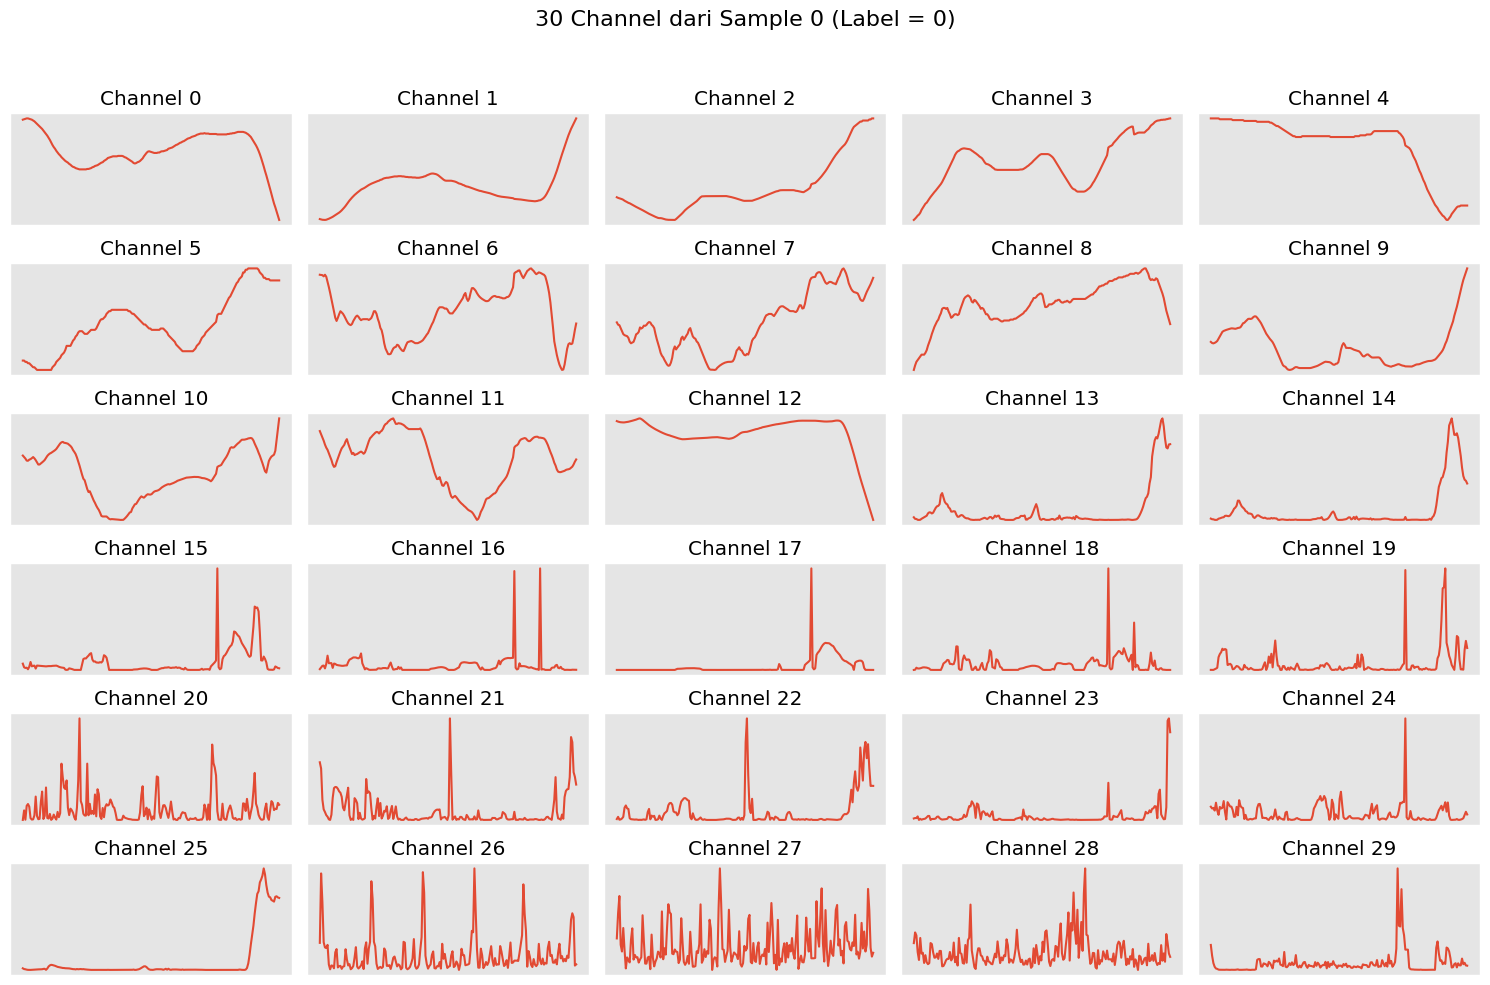

In [7]:
# Pilih index sampel
sample_idx = 0

sample_data = X_total.iloc[sample_idx]  # semua 30 channel
sample_label = y_total[sample_idx]

plt.figure(figsize=(15, 10))

# Loop untuk tiap channel
for ch in range(30):
    plt.subplot(6, 5, ch + 1)  # grid 6x5 untuk 30 channel
    plt.plot(sample_data.iloc[ch].values)
    plt.title(f"Channel {ch}")
    plt.xticks([])
    plt.yticks([])

plt.suptitle(f"30 Channel dari Sample {sample_idx} (Label = {sample_label})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## **Mengecek Missing Value**

In [8]:
# Total sampel
total_samples = X_total.shape[0]

# Cek missing value pada label
missing_labels = y_total.isna().sum()
print("Cek missing value pada label:")
print(f"Jumlah missing value di label: {missing_labels}")

# Cek missing value per sampel
def has_nan_in_row(row):
    for ts in row:
        if np.any(np.isnan(np.array(ts))):
            return True
    return False

missing_per_sample = X_total.apply(has_nan_in_row, axis=1)
num_missing_samples = missing_per_sample.sum()

print("\nCek missing value per sampel:")
print(f"Jumlah sampel yang mengandung missing value: {num_missing_samples}")

if num_missing_samples == 0:
    print(f"Tidak ada missing value di dataset dengan jumlah total sampel {total_samples}.")
else:
    print("Ada missing value di dataset.")

Cek missing value pada label:
Jumlah missing value di label: 0

Cek missing value per sampel:
Jumlah sampel yang mengandung missing value: 0
Tidak ada missing value di dataset dengan jumlah total sampel 1323.


## **Visualisasi Jumlah dan Sebaran Target**

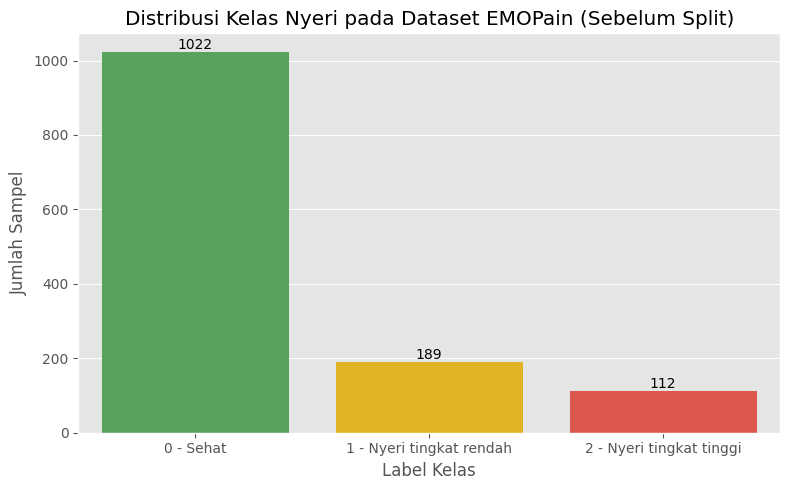


Rincian Jumlah Data per Kelas:
0    1022
1     189
2     112
Name: count, dtype: int64


In [9]:
# Mapping label
label_mapping = {
    0: "Sehat",
    1: "Nyeri tingkat rendah",
    2: "Nyeri tingkat tinggi"
}

palette = {
    0: "#4CAF50",   # hijau
    1: "#FFC107",   # kuning
    2: "#F44336"    # merah
}

# Pastikan y_total bertipe int
y_plot = y_total.astype(int)

# 1️⃣ Visualisasi distribusi kelas
plt.figure(figsize=(8, 5))

ax = sns.countplot(
    x=y_plot,
    hue=y_plot,
    order=[0, 1, 2],
    palette=palette,
    legend=False
)

plt.title("Distribusi Kelas Nyeri pada Dataset EMOPain (Sebelum Split)")
plt.xlabel("Label Kelas")
plt.ylabel("Jumlah Sampel")

# Set posisi tick dan label
ax.set_xticks(range(3))
ax.set_xticklabels([
    f"0 - {label_mapping[0]}",
    f"1 - {label_mapping[1]}",
    f"2 - {label_mapping[2]}"
])

# Tambahkan jumlah sampel di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Tampilkan tabel jumlah data per kelas
print("\nRincian Jumlah Data per Kelas:")
print(pd.Series(y_total).value_counts().sort_index())

## **Menampilkan grafik setiap kelas**

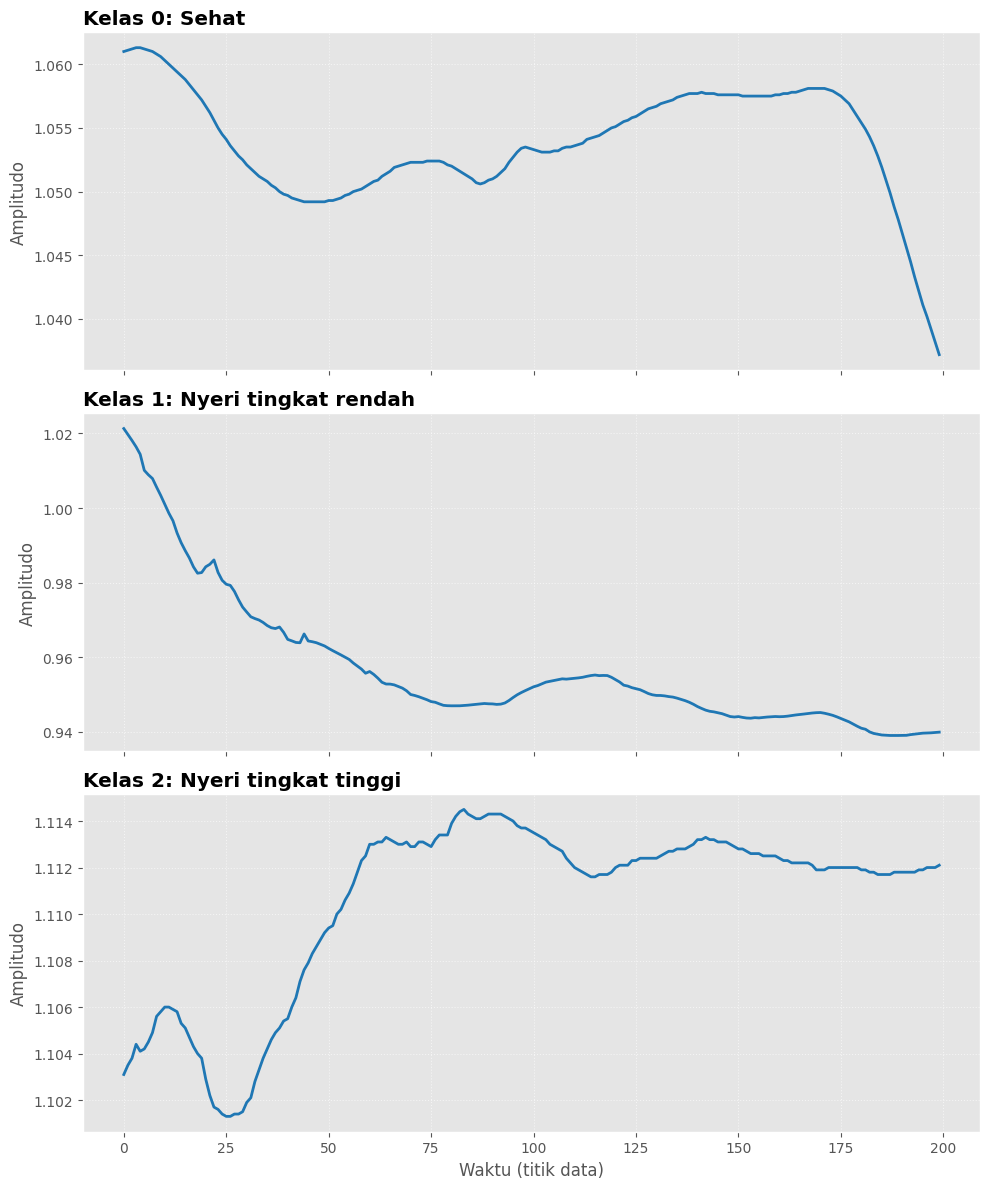

In [10]:
# Label kelas
class_names = {
    0: 'Sehat',
    1: 'Nyeri tingkat rendah',
    2: 'Nyeri tingkat tinggi'
}

num_classes = len(class_names)

# Buat figure dengan subplots (satu per kelas)
fig, axes = plt.subplots(num_classes, 1, figsize=(10, 4*num_classes), sharex=True)

for i, class_id in enumerate(class_names.keys()):
    # Ambil index sampel pertama untuk kelas ini
    idx = np.where(y_total == class_id)[0][0]
    series_data = X_total.iloc[idx, 0].values  # channel 0

    # Plot
    axes[i].plot(series_data, color='#1f77b4', linewidth=2)
    axes[i].set_title(f"Kelas {class_id}: {class_names[class_id]}", fontweight='bold', loc='left')
    axes[i].set_ylabel("Amplitudo")
    axes[i].grid(True, linestyle=':', alpha=0.6)

plt.xlabel("Waktu (titik data)")
plt.tight_layout()
plt.show()


## **Cek Duplikasi**

In [11]:
# Total sampel
total_samples = X_total.shape[0]

# Ubah array menjadi tuple agar bisa dicek duplicate (tanpa applymap)
X_tuple = X_total.apply(lambda col: col.map(tuple))  # gunakan map per kolom

# Duplicate berdasarkan fitur (channel) saja
duplicate_features = X_tuple.duplicated(keep=False)
num_duplicate_features = duplicate_features.sum()

# Duplicate berdasarkan fitur (channel)r + label
combined = X_tuple.copy()
combined['label'] = y_total.values
duplicate_combined = combined.duplicated(keep=False)
num_duplicate_combined = duplicate_combined.sum()

# Tampilkan hasil
print("=== Pengecekan Duplikat Dataset EMOPain ===")
print(f"Jumlah total sampel         : {total_samples}")
print(f"Jumlah sampel duplikat fitur saja     : {num_duplicate_features}")
print(f"Jumlah sampel duplikat fitur + label : {num_duplicate_combined}")
if num_duplicate_combined > 0:
    duplicate_indices = np.where(duplicate_combined)[0]
    print(f"Index sampel duplikat (fitur + label) : {duplicate_indices.tolist()}")
else:
    print("Tidak ada sampel duplikat di dataset.")

=== Pengecekan Duplikat Dataset EMOPain ===
Jumlah total sampel         : 1323
Jumlah sampel duplikat fitur saja     : 0
Jumlah sampel duplikat fitur + label : 0
Tidak ada sampel duplikat di dataset.


# **3. Tahap Preprocessing**

## **Pembagian Dataset untuk Training, Testing, dan Manual Testing**

<div align="justify">Proses pembagian dataset EMOPain dilakukan dalam dua tahap untuk memastikan dataset siap digunakan baik untuk pelatihan model maupun uji coba manual pada aplikasi. Pada tahap pertama, sekitar 20% dari seluruh sampel dipisahkan dan disimpan secara terpisah sebagai data manual testing. Data ini tidak akan disentuh selama pelatihan model, tetapi disiapkan khusus untuk pengujian aplikasi.Sisanya, sekitar 80% dari dataset, digunakan untuk modeling, dan kemudian pada tahap kedua dibagi lagi menjadi data latih (train) sebesar 80% dan data uji (test) sebesar 20%.Dengan cara ini, dataset terbagi menjadi tiga bagian: data latih untuk training model, data uji untuk evaluasi model, dan data manual testing untuk uji coba aplikasi secara independen.

In [12]:
print("MEMULAI PROSES PEMBAGIAN DATA (STRATIFIED)...")

# TAHAP 1: MEMISAHKAN DATA MANUAL (HOLDOUT)
X_sisa, X_manual, y_sisa, y_manual = train_test_split(
    X_total, y_total,
    test_size=0.10,      # 10% untuk manual testing
    random_state=42,
    stratify=y_total
)

print(f"\n[TAHAP 1 MEMISAHKAN DATA MANUAL]")
print(f"   - Data Disimpan untuk Manual : {X_manual.shape[0]} Data")
print(f"   - Data Sisa untuk Modeling   : {X_sisa.shape[0]} Data")

# Simpan data manual ke CSV
X_manual_flat = pd.DataFrame({
    f"channel_{ch}": X_manual[ch].apply(lambda ts: ts.tolist())
    for ch in X_manual.columns
})
X_manual_flat['label'] = y_manual.values
X_manual_flat.to_csv("manual_testing_data.csv", index=False)
print("Data manual testing tersimpan di file 'manual_testing_data.csv'")

# TAHAP 2: MEMBAGI DATA MODEL (TRAIN 80% : TEST 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_sisa, y_sisa,
    test_size=0.20,      # 20% untuk test model
    random_state=42,
    stratify=y_sisa
)

print(f"\n[TAHAP 2 MEMBAGI DATA MODEL]")
print(f"   - Data Latih (TRAIN) : {X_train.shape[0]} Data")
print(f"   - Data Uji (TEST)    : {X_test.shape[0]} Data")


MEMULAI PROSES PEMBAGIAN DATA (STRATIFIED)...

[TAHAP 1 MEMISAHKAN DATA MANUAL]
   - Data Disimpan untuk Manual : 133 Data
   - Data Sisa untuk Modeling   : 1190 Data
Data manual testing tersimpan di file 'manual_testing_data.csv'

[TAHAP 2 MEMBAGI DATA MODEL]
   - Data Latih (TRAIN) : 952 Data
   - Data Uji (TEST)    : 238 Data


## **Visualisasi Jumlah dan Sebaran Target di data Train**

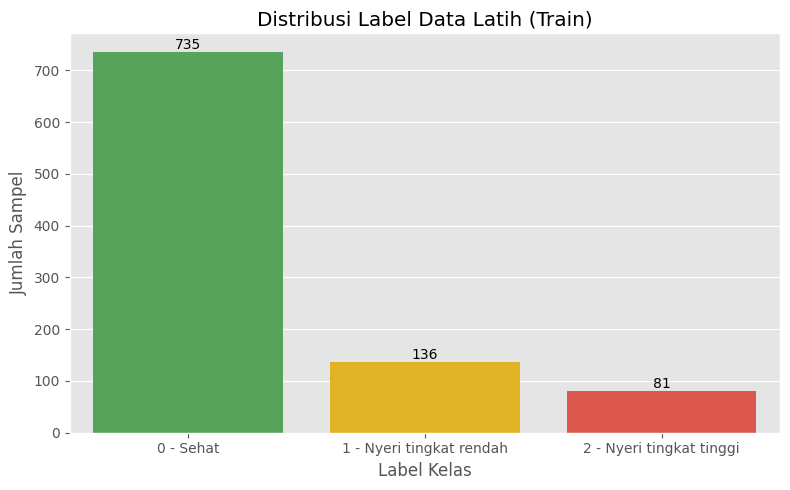


Rincian jumlah sampel per kelas di data train:
0    735
1    136
2     81
Name: count, dtype: int64


In [13]:
# Mapping label (sesuaikan dengan dataset EMOPain)
label_mapping = {
    0: "Sehat",
    1: "Nyeri tingkat rendah",
    2: "Nyeri tingkat tinggi"
}

palette = {
    0: "#4CAF50",   # hijau
    1: "#FFC107",   # kuning
    2: "#F44336"    # merah
}

# Pastikan y_train bertipe int
y_plot = y_train.astype(int)

plt.figure(figsize=(8, 5))

ax = sns.countplot(
    x=y_plot,
    hue=y_plot,             # hilangkan warning seaborn
    order=[0, 1, 2],
    palette=palette,
    legend=False
)

plt.title("Distribusi Label Data Latih (Train)")
plt.xlabel("Label Kelas")
plt.ylabel("Jumlah Sampel")

# Set label x-axis
ax.set_xticks(range(3))
ax.set_xticklabels([
    f"0 - {label_mapping[0]}",
    f"1 - {label_mapping[1]}",
    f"2 - {label_mapping[2]}"
])

# Tambahkan jumlah sampel di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Tampilkan tabel jumlah per kelas
print("\nRincian jumlah sampel per kelas di data train:")
print(pd.Series(y_train).value_counts().sort_index())

# **Balancing Data untuk data Training**
<div align="justify">Dataset EMOPain sangat tidak seimbang : kelas “Sehat” 735 sampel, “Nyeri rendah” 136, dan “Nyeri tinggi” 81. Ketidakseimbangan ini membuat model bias ke kelas mayoritas. Untuk mengatasinya, dilakukan balancing data agar tiap kelas memiliki jumlah seimbang. Metode SMOTE membuat sampel sintetis baru untuk kelas minoritas dengan interpolasi(membuat data baru di antara data yang sudah ada.), sehingga model bisa belajar semua kelas secara adil.

In [14]:
# Flatten data train agar bisa dipakai SMOTE
X_train_flat = np.array([np.concatenate(X_train.iloc[i].values) for i in range(len(X_train))])
y_train_array = np.array(y_train)

print("Shape sebelum SMOTE:")
print("X_train_flat:", X_train_flat.shape)
print("y_train:", y_train_array.shape)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_flat, y_train_array)

print("\nShape setelah SMOTE:")
print("X_train_res:", X_train_res.shape)
print("y_train_res:", y_train_res.shape)

# Cek distribusi label setelah SMOTE
unique, counts = np.unique(y_train_res, return_counts=True)
print("\nDistribusi label setelah SMOTE:")
for u, c in zip(unique, counts):
    print(f"Label {u}: {c} sampel")


Shape sebelum SMOTE:
X_train_flat: (952, 6000)
y_train: (952,)

Shape setelah SMOTE:
X_train_res: (2205, 6000)
y_train_res: (2205,)

Distribusi label setelah SMOTE:
Label 0: 735 sampel
Label 1: 735 sampel
Label 2: 735 sampel


## **Visualisasi Data Training setelah proses Balancing Data**

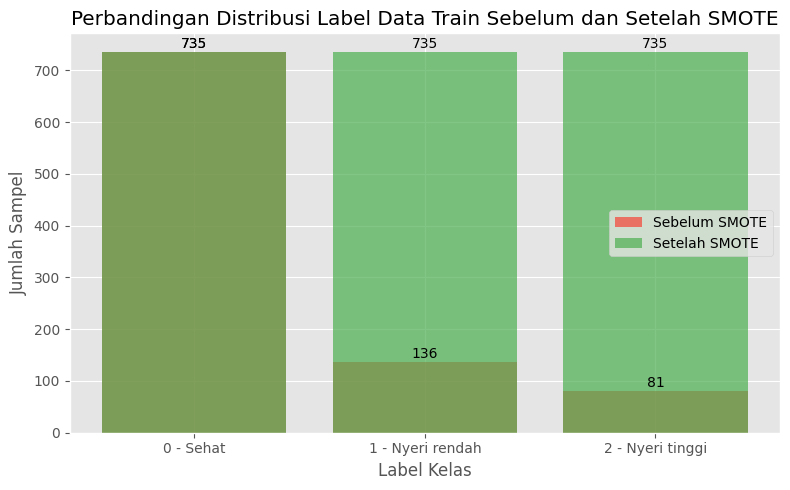

In [15]:
# Distribusi sebelum SMOTE
unique_before, counts_before = np.unique(y_train, return_counts=True)
df_before = pd.DataFrame({
    'Label': unique_before,
    'Jumlah': counts_before,
    'Status': 'Sebelum SMOTE'
})

# Distribusi setelah SMOTE
unique_after, counts_after = np.unique(y_train_res, return_counts=True)
df_after = pd.DataFrame({
    'Label': unique_after,
    'Jumlah': counts_after,
    'Status': 'Setelah SMOTE'
})

# Gabungkan
df_plot = pd.concat([df_before, df_after], axis=0)

# Mapping label untuk keterangan
label_mapping = {
    0: "Sehat",
    1: "Nyeri rendah",
    2: "Nyeri tinggi"
}
df_plot['Label_name'] = df_plot['Label'].map(label_mapping)

# Plot
plt.figure(figsize=(8,5))
for status, color in zip(['Sebelum SMOTE','Setelah SMOTE'], ['#F44336','#4CAF50']):
    subset = df_plot[df_plot['Status'] == status]
    bars = plt.bar(subset['Label_name'], subset['Jumlah'], alpha=0.7, label=status, color=color)

    # Tambahkan jumlah sampel di atas bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}',
                 ha='center', va='bottom', fontsize=10)

# Tambahkan nomor kelas di label x-axis
plt.xticks(ticks=range(len(label_mapping)), labels=[f"{i} - {label_mapping[i]}" for i in label_mapping.keys()])

plt.title("Perbandingan Distribusi Label Data Train Sebelum dan Setelah SMOTE")
plt.xlabel("Label Kelas")
plt.ylabel("Jumlah Sampel")
plt.legend()
plt.tight_layout()
plt.show()

# **4. Modeling**

<div align="justify">Random Forest saya pilih karena cocok digunakan untuk dataset EMOPain karena sifatnya yang mampu menangani data multichannel dan high-dimensional. Dataset EMOPain memiliki 30 channel dengan 200 titik per channel, sehingga setiap sampel memiliki 6000 fitur setelah di-flatten. RF efektif untuk banyak fitur tanpa memerlukan normalisasi atau asumsi distribusi tertentu, serta tahan terhadap outlier dan noise yang sering muncul pada sinyal biosensor. Proses modeling dimulai dengan flattening data train hasil SMOTE agar setiap kelas seimbang, sementara data test tetap asli untuk evaluasi performa nyata. Model RF kemudian dilatih menggunakan 200 pohon keputusan, di mana setiap pohon belajar dari subset sampel dan subset fitur, sehingga membentuk ensemble yang kuat dan mengurangi risiko overfitting.

In [16]:
# RANDOM FOREST - TRAINING MODEL
# Parameters
n_samples_train = X_train_res.shape[0]   # 2205 sampel
n_channels = 30
ts_length = 200

# Flatten data train (hasil SMOTE)
X_train_flat_rf = np.zeros((n_samples_train, n_channels * ts_length), dtype=np.float64)
for i in range(n_samples_train):
    X_train_flat_rf[i, :] = np.concatenate([X_train_res[i, ch*ts_length:(ch+1)*ts_length]
                                            for ch in range(n_channels)])

y_train_array = np.array(y_train_res, dtype=np.int64)

# Training Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=200,  # jumlah pohon
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest dengan data train 2205 sampel...")
rf_clf.fit(X_train_flat_rf, y_train_array)
print("Random Forest berhasil dilatih!")

Training Random Forest dengan data train 2205 sampel...


Random Forest berhasil dilatih!


# **5. Evaluasi**

<div align="justify">Setelah training, model dievaluasi pada data test menggunakan metrik seperti akurasi, precision, recall, f1-score, dan confusion matrix untuk menilai performa prediksi per kelas, memastikan model dapat mengenali pola semua kelas dengan baik.


>>> AKURASI RANDOM FOREST: 88.66% <<<

--- CLASSIFICATION REPORT ---

                 precision    recall  f1-score   support

       0: Sehat       0.95      0.94      0.94       184
1: Nyeri rendah       0.71      0.79      0.75        34
2: Nyeri tinggi       0.65      0.55      0.59        20

       accuracy                           0.89       238
      macro avg       0.77      0.76      0.76       238
   weighted avg       0.89      0.89      0.89       238



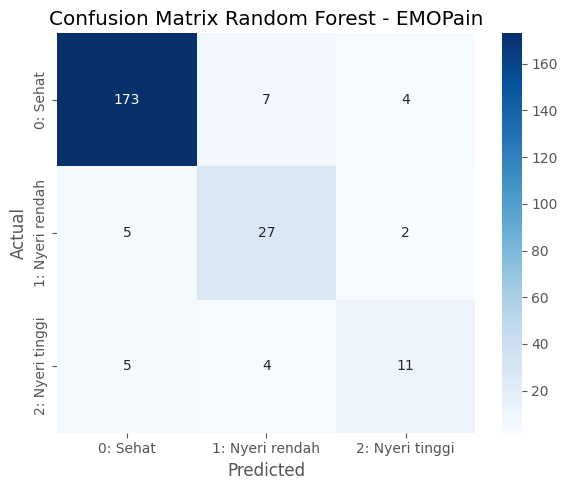

In [17]:
# RANDOM FOREST - EVALUASI

# Flatten data test
n_samples_test = X_test.shape[0]
X_test_flat_rf = np.zeros((n_samples_test, n_channels * ts_length), dtype=np.float64)
for i in range(n_samples_test):
    X_test_flat_rf[i, :] = np.concatenate([X_test.iloc[i, ch].to_numpy(dtype=np.float64)
                                           for ch in range(n_channels)])

y_test_array = np.array(y_test, dtype=np.int64)

# Prediksi
y_pred_rf = rf_clf.predict(X_test_flat_rf)

# Akurasi
acc_rf = accuracy_score(y_test_array, y_pred_rf)
print(f"\n>>> AKURASI RANDOM FOREST: {acc_rf*100:.2f}% <<<")

# Laporan klasifikasi
target_names = ['0: Sehat', '1: Nyeri rendah', '2: Nyeri tinggi']
print("\n--- CLASSIFICATION REPORT ---\n")
print(classification_report(y_test_array, y_pred_rf, target_names=target_names))

# Confusion Matrix
cm_rf = confusion_matrix(y_test_array, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Random Forest - EMOPain")
plt.tight_layout()
plt.show()

# **6. Deployment**
<div align="justify">Setelah model Random Forest tervalidasi dengan akurasi 88.66%, langkah terakhir adalah melakukan penyimpanan model dan simulasi penggunaan nyata. Pada tahap ini, kita akan menggunakan Data Manual (133 sampel) yang telah dipisahkan sejak awal, sebelum proses training. Data ini bersifat unseen, artinya model tidak pernah melihatnya selama training maupun evaluasi, sehingga dapat berfungsi sebagai pengujian black-box yang paling valid. Dengan menggunakan Data Manual, kita bisa menilai performa model di kondisi dunia nyata dan memastikan prediksi yang dihasilkan dapat diandalkan sebelum implementasi ke aplikasi seperti Streamlit.

In [18]:
import joblib

# Simpan model ke file
joblib.dump(rf_clf, "rf_clf.pkl")
print("Model Random Forest berhasil disimpan sebagai rf_clf.pkl")

Model Random Forest berhasil disimpan sebagai rf_clf.pkl
